# Workshop 4: Supervised Machine Learning

This notebook will give you an introduction to supervised machine learning.

This workshop will work slightly differently to the previous ones - in this workshop, I will show you have to fit a model and report it using python, and then you will apply the same process to the nanoparticle dataset from Yousfan et al.

## An example of supervised machine learning

The below steps will take an example (generated) dataset and show you how to fit a random forest model to it

In [1]:
## We import necessary libraries:

# Numpy and pandas for working with data
import numpy as np
import pandas as pd

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules for machine learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


### Generate a dataset

In [2]:
## This generates an example dataset:
# Generate a dataset with 10 features affecting the target variable
np.random.seed(42)
num_samples = 100

# Generate 10 predictive features
X = np.random.uniform(0, 10, (num_samples, 10))

# Define a target variable based on a non-linear combination of features
y = (3 * X[:, 0] + 2 * X[:, 1]**2 + np.sin(X[:, 2]) - 1.5 * X[:, 3] +
     0.5 * X[:, 4] * X[:, 5] - X[:, 6] + 1.2 * X[:, 7]**1.5 + 
     np.random.normal(0, 3, num_samples))  # Adding noise

# Create a DataFrame for easier visualization
feature_names = [f"Feature_{i+1}" for i in range(10)]
data = pd.DataFrame(X, columns=feature_names)
data["Target"] = y

# Display first few rows
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,3.745401,9.507143,7.319939,5.986585,1.560186,1.559945,0.580836,8.661761,6.011150,7.080726,215.648573
1,0.205845,9.699099,8.324426,2.123391,1.818250,1.834045,3.042422,5.247564,4.319450,2.912291,195.512829
2,6.118529,1.394939,2.921446,3.663618,4.560700,7.851760,1.996738,5.142344,5.924146,0.464504,48.012245
3,6.075449,1.705241,0.650516,9.488855,9.656320,8.083973,3.046138,0.976721,6.842330,4.401525,49.389036
4,1.220382,4.951769,0.343885,9.093204,2.587800,6.625223,3.117111,5.200680,5.467103,1.848545,60.765340


### Prepare our data for modelling

In [3]:
# Split dataset into features (X) and target variable (y)
X = data.drop(columns=["Target"])
y = data["Target"]

In [4]:
## We now have an X are y where X are the features we are using to predict, y are the targets

In [5]:
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
## We scale the training and testing set seperately
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Fit our machine learning model

In [38]:
# Load a Random Forest Regressor, we can set a number of parameters such as the number of trees (n_estimators)
# and the maximum depth of the trees (max_depth)
rf_model = RandomForestRegressor(n_estimators=100, max_depth = 10, random_state=12453, criterion= "absolute_error")

In [39]:
## cross_val_score splits the data into cv number of subsets, and performs cross validation training and testing
# cv is the number of sets to break the data into, and scoring is the scoring method (MAE, MSE).
# We use neg_mean_absolute_error because the algorithm will try to maximise the value, so we want to invert it
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring = "neg_mean_absolute_error")

In [40]:
# These are the MAE scores for each of the 5 cross validation splits we ran earlier 
# we add the (-) to invert them back to MAE from negative MAE
print(-cv_scores)

[15.63135926 10.88191169 14.52088876 18.85304603 14.17897854]


In [41]:
## To test our model on the test dataset, we first need to fit it to the trianing data, then apply it to the test data

## We fit the model to the training data
rf_model.fit(X_train_scaled, y_train)  # Train final model on entire training set

# Evaluate the model on the unseen test set
y_test_pred = rf_model.predict(X_test_scaled)

In [46]:
## We calculate the MAE
test_mae = mean_absolute_error(y_test, y_test_pred)

In [47]:
test_mae

16.796806301042533

### Plot the accuracies

In [53]:
# Compute statistics
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Labels for the bars
labels = ["CV Error", "Test Error"]
scores = [-cv_mean, test_mae]
errors = [cv_std, 0]  # Error bar only for CV scores

Text(0.5, 1.0, 'Model Performance: CV vs Test Score')

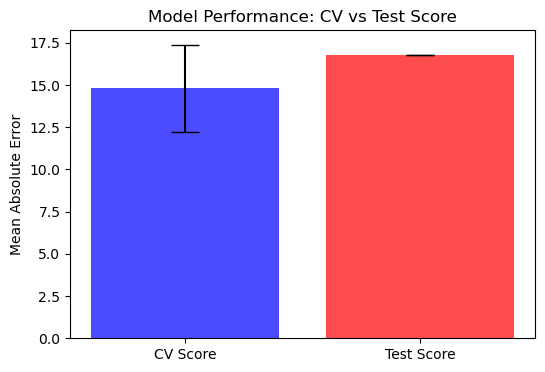

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(labels, scores, yerr=errors, capsize=10, alpha=0.7, color=["blue", "red"])

# Labels and title
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Model Performance: CV vs Test Score")

#### Plot a parity plot of the test predictions

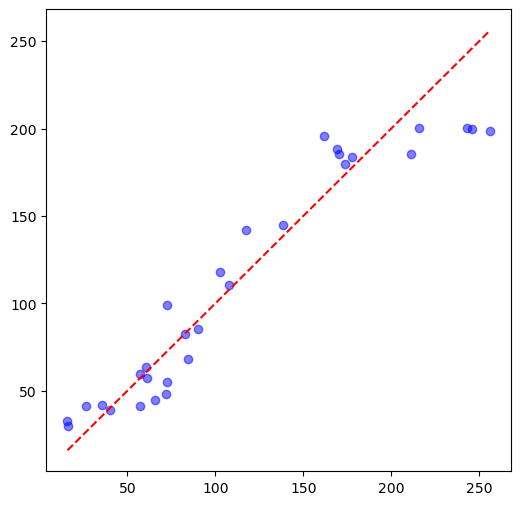

In [63]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")

This has shown you how to fit and asses a model using a standard workflow for supervised machine learning

# The major task for the workshop is now: Apply this workflow to the Nanoparticle dataset we have been working on previously

We want to see if we can predict the release rate of the drug from the nanoparticle based on the nanoparticle features

The steps you will need to go through are:

- Get the numeric values from the dataframe (done for you below)
- Split the data in X and y
- Split the data into train and test sets
- Scale the data appropiately
- Perform cross validation on the training set
- Fit a model on the full training set, and test it on the test set
- Plot the results and assess the accuracy of the model

This is the same as the steps above for the example datasets

Once you have set up and established the model - here are a few questions you can explore:

- Adjust the number of trees in the model (_n_estimators_) - how does this change the model accuracy?
- Does much change when you use Mean Squared Error rather than Mean Absolute Error for model fitting?
- Try changing the model to a linear regression (_from sklearn.linear_model import LinearRegression_) - how does the accuracy change?

In [75]:
## This function loads your data - nanoparticle_data_numeric then contains all the numeric data from Yousfan et al.

data = {'Weight': [321.993, 315.48, 284.74, 171.2383, 853.906, 654.595, 515.986, 293.363, 385.503, 444.435, 368.38, 242.316, 198.264, 368.38, 368.38, 242.316, 242.316, 242.316, 236.269, 308.3, 368.38, 338.4, 242.316, 368.38, 242.316, 314.462, 462.4, 315.711, 368.38, 242.316, 146.143, 272.382, 242.316, 375.864, 410.212, 242.316, 315.675, 368.38, 252.268, 448.385, 242.316, 287.357, 284.74, 243.301, 213.661, 410.212, 222.239, 315.675, 315.027, 222.239, 244.261, 252.268, 221.339, 252.268, 375.864, 375.14, 469.55, 410.212, 222.239, 244.261, 379.492, 383.167, 242.316, 351.401, 312.432, 351.401, 315.675, 315.027, 270.053, 232.278, 382.519, 446.4, 446.4, 463.52, 159.687, 315.711, 287.357, 159.687, 382.519, 368.38, 263.375, 368.38, 256.091, 263.375, 312.432, 393.5, 256.091, 368.38, 256.253, 368.38, 263.375, 368.38, 315.027, 315.675, 256.091, 308.286, 393.5, 308.286, 368.38, 228.243, 383.167, 293.363, 242.316, 302.236, 393.459, 221.339, 252.268, 315.675, 379.492, 448.385, 302.236, 242.316, 242.316, 454.171, 272.382, 213.661, 242.316, 243.301, 348.352, 375.864, 348.352, 233.69, 348.352, 410.485, 187.286, 326.13, 413.421, 348.352, 326.13, 348.352, 319.85, 315.48, 321.993], 'logP': [3.01, 4.7, 2.63, 2.26, 3.2, 3.89, 4.34, 2.56, 1.95, -0.72, 3.62, 1.78, 3.13, 3.62, 3.62, 1.78, 1.78, 1.78, 2.77, 4.07, 3.62, 4.07, 1.78, 3.62, 1.78, 3.87, -2.56, 2.76, 3.62, 1.78, 1.72, 3.57, 1.78, 3.7, 3.27, 1.78, 3.89, 3.62, 1.76, 5.21, 1.78, 2.25, 2.63, 2.83, -0.82, 3.27, 3.54, 3.89, 3.89, 3.54, 4.42, 2.26, 3.47, 2.26, 3.7, 3.7, 2.04, 3.27, 3.54, 4.42, 4.14, 2.93, 1.78, 2.28, 3.61, 2.28, 3.89, 3.89, 3.19, 1.42, 3.84, 3.0, 1.27, 2.0, 0.37, 2.76, 2.25, 0.37, 3.84, 3.62, 2.71, 3.62, 1.87, 2.71, 3.61, 2.401, 1.87, 3.62, 3.04, 3.62, 2.71, 3.62, 3.89, 3.89, 1.87, 1.02, 3.234, 1.02, 3.62, 2.57, 2.93, 2.56, 1.78, 1.81, 4.66, 3.47, 2.26, 3.89, 4.14, 5.21, 1.81, 1.78, 1.78, -0.05, 3.57, -0.82, 1.78, 2.83, 1.91, 3.7, 1.91, 2.83, 1.91, 3.27, 3.08, 3.67, 2.0, 1.91, 3.67, 1.91, 3.61, 5.01, 3.01], 'Solubility': [0.132, 0.009, 0.012, 0.025, 0.006, 0.086, 0.002, 0.248, 0.588, 0.63, 0.006, 0.166, 0.136, 0.006, 0.006, 0.166, 0.166, 0.166, 0.152, 0.014, 0.006, 0.014, 0.166, 0.005, 0.166, 0.005, 0.056, 0.011, 0.006, 0.166, 1.0, 0.021, 0.166, 0.004, 0.171, 0.166, 0.009, 0.006, 0.16, 0.008, 0.166, 0.19, 0.012, 0.00776, 0.712, 0.171, 0.008, 0.009, 0.009, 0.008, 0.025, 0.071, 0.78, 0.071, 0.004, 0.004, 0.121, 0.171, 0.008, 0.025, 0.005, 0.04, 0.166, 0.154, 0.094, 0.154, 0.009, 0.009, 0.153, 0.143, 0.001, 0.153, 0.054, 0.0, 0.0, 0.011, 0.19, 0.0, 0.001, 0.006, 0.75, 0.006, 0.488, 0.75, 0.094, 0.1, 0.488, 0.006, 0.055, 0.006, 0.75, 0.006, 0.009, 0.009, 0.488, 0.645, 0.1, 0.645, 0.006, 0.069, 0.04, 0.248, 0.166, 0.261, 0.003, 0.78, 0.071, 0.009, 0.005, 0.008, 0.261, 0.166, 0.166, 0.082, 0.021, 0.712, 0.166, 0.00776, 0.511, 0.004, 0.511, 0.111, 0.511, 0.171, 0.025, 0.186, 0.181, 0.511, 0.186, 0.511, 0.03, 0.009, 0.132], 'Pgp': ['no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no'], 'DrugCarrierRatio': [1.0, 1.0, 0.156, 1.0, 0.1, 0.28, 0.3, 0.1, 1.0, 0.1, 0.1, 0.076, 0.05, 0.1, 0.1, 0.076, 0.1, 0.076, 0.5, 0.1, 0.1, 0.1, 0.076, 0.1, 0.076, 0.333, 0.3, 1.0, 0.1, 0.076, 0.05, 0.2, 0.076, 0.04, 0.1, 0.1, 0.1, 0.1, 1.0, 0.1, 0.1, 0.1, 0.1, 0.133, 0.1, 0.1, 1.0, 0.3, 0.3, 1.0, 0.111, 0.48, 0.5, 0.48, 0.5, 0.1, 0.1, 0.1, 1.0, 0.111, 0.25, 1.0, 0.007, 0.2, 0.05, 0.2, 0.3, 0.3, 0.02, 0.1, 0.011, 0.02, 0.2, 0.02, 0.5, 1.0, 0.1, 0.5, 0.011, 0.167, 0.1, 0.2, 0.8, 0.1, 0.05, 0.16, 0.8, 0.01, 0.1, 0.167, 0.1, 0.01, 0.3, 0.3, 0.8, 0.2, 0.16, 0.2, 0.167, 0.1, 1.0, 0.1, 0.1, 0.05, 0.1, 0.5, 0.48, 0.1, 1.0, 0.1, 0.05, 0.1, 0.1, 2.0, 0.2, 0.1, 0.1, 0.1, 0.1, 0.04, 0.1, 0.1, 0.1, 0.166, 0.3, 1.0, 0.1, 0.1, 1.0, 0.12, 0.3, 1.0, 0.1], 'Position': ['core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'matrix', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'matrix', 'matrix', 'core', 'core', 'core', 'matrix', 'core', 'core', 'matrix', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'matrix', 'core', 'core', 'core', 'core', 'core', 'core', 'matrix', 'core', 'core', 'core', 'core', 'matrix', 'core', 'core', 'core', 'matrix', 'core', 'matrix', 'core', 'matrix', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'matrix', 'matrix', 'core', 'matrix', 'core', 'matrix', 'core', 'matrix', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'matrix', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'matrix', 'matrix', 'matrix', 'core', 'core', 'core', 'core', 'matrix', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'matrix', 'matrix', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core', 'core'], 'Comp1': ['chitosan', 'PLGA', 'PLGA', 'chitosan', 'PLGA', 'chitosan', 'chitosan', 'solid lipid', 'chitosan', 'solid lipid', 'PLGA', 'PLGA', 'PLGA', 'PLGA', 'PLGA', 'PLGA', 'PLGA', 'PLGA', 'chitosan', 'acrylamide', 'PLGA', 'acrylamide', 'PLGA', 'acrylamide', 'PLGA', 'chitosan', 'chitosan', 'Poloxamer', 'PLGA', 'PLGA', 'PLGA', 'chitosan', 'PLGA', 'solid lipid', 'chitosan', 'PLGA', 'solid lipid', 'PLGA', 'solid lipid', 'PCL', 'PLGA', 'solid lipid', 'PLGA', 'solid lipid', 'PLGA', 'solid lipid', 'phospholipids', 'solid lipid', 'solid lipid', 'phospholipids', 'PLGA', 'PLGA', 'chitosan', 'PLGA', 'solid lipid', 'solid lipid', 'solid lipid', 'solid lipid', 'phospholipids', 'solid lipid', 'solid lipid', 'chitosan', 'solid lipid', 'protien', 'Poloxamer', 'protien', 'solid lipid', 'solid lipid', 'PLGA', 'PCL', 'PLGA', 'PLGA', 'phospholipids', 'PLGA', 'other', 'Poloxamer', 'solid lipid', 'other', 'PLGA', 'PVP', 'PLGA', 'acrylamide', 'PLGA', 'PLGA', 'Poloxamer', 'PLGA', 'PLGA', 'acrylamide', 'solid lipid', 'PVP', 'PLGA', 'acrylamide', 'solid lipid', 'solid lipid', 'PLGA', 'PLGA', 'PLGA', 'PLGA', 'PVP', 'solid lipid', 'chitosan', 'solid lipid', 'PLGA', 'PLGA', 'solid lipid', 'chitosan', 'PLGA', 'solid lipid', 'PLGA', 'PCL', 'PLGA', 'PLGA', 'PLGA', 'acrylamide', 'chitosan', 'PLGA', 'PLGA', 'solid lipid', 'phospholipids', 'solid lipid', 'phospholipids', 'other', 'solid lipid', 'PVP', 'PLGA', 'solid lipid', 'solid lipid', 'solid lipid', 'solid lipid', 'phospholipids', 'PLGA', 'chitosan', 'PLGA'], 'Comp2': ['none', 'PEG', 'none', 'none', 'none', 'none', 'other', 'phospholipids', 'none', 'none', 'PEG', 'other', 'none', 'PEG', 'PEG', 'other', 'none', 'other', 'none', 'none', 'PEG', 'none', 'other', 'none', 'other', 'sodium alginate', 'none', 'none', 'PEG', 'other', 'PEG', 'none', 'other', 'none', 'solid lipid', 'none', 'none', 'PEG', 'chitosan', 'none', 'none', 'cholesterol', 'none', 'none', 'none', 'none', 'none', 'none', 'PEG', 'solid lipid', 'none', 'phospholipids', 'none', 'chitosan', 'none', 'none', 'none', 'none', 'none', 'phospholipids', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'PEG', 'none', 'none', 'PEG', 'cholesterol', 'PEG', 'none', 'none', 'cholesterol', 'other', 'none', 'none', 'none', 'none', 'none', 'none', 'none', 'PEG', 'none', 'PEG', 'none', 'none', 'none', 'PEG', 'none', 'none', 'none', 'none', 'PEG', 'chitosan', 'none', 'protien', 'none', 'phospholipids', 'PEG', 'phospholipids', 'phospholipids', 'none', 'phospholipids', 'none', 'none', 'none', 'phospholipids', 'PEG', 'PEG', 'tween', 'none', 'none', 'PEG', 'sodium alginate', 'tween', 'none', 'tween', 'none', 'tween', 'none', 'none', 'phospholipids', 'none', 'tween', 'phospholipids', 'solid lipid', 'none', 'none', 'none'], 'Size': [172.4, 122.0, 170.15, 153.0, 136.78, 200.0, 400.0, 92.28, 184.3, 53.0, 195.0, 125.4, 91.0, 110.0, 110.0, 153.2, 78.1, 153.2, 216.5, 94.28, 195.0, 91.23, 125.4, 92.46, 125.4, 204.0, 200.0, 124.15, 195.0, 153.2, 200.0, 269.3, 125.4, 209.5, 132.7, 78.1, 161.0, 110.0, 120.6, 212.2, 78.1, 149.9, 182.0, 167.7, 124.8, 174.9, 165.2, 19.04, 26.45, 154.2, 154.0, 170.63, 201.2, 400.0, 115.1, 121.46, 158.1, 174.9, 162.1, 176.6, 121.0, 131.08, 21.26, 176.0, 95.7, 176.0, 19.04, 19.0, 30.04, 166.7, 201.5, 24.98, 190.0, 60.0, 189.0, 124.15, 149.9, 225.0, 201.5, 20.0, 141.0, 152.0, 133.9, 157.0, 95.7, 365.3, 151.0, 197.0, 217.53, 70.0, 158.0, 184.0, 19.0, 19.04, 150.0, 106.0, 322.6, 142.0, 200.0, 108.1, 131.08, 92.28, 78.0, 232.4, 36.7, 201.2, 170.63, 161.0, 89.67, 212.2, 203.0, 78.0, 89.0, 220.0, 269.3, 124.8, 89.0, 167.7, 134.7, 209.5, 148.7, 336.0, 131.2, 103.4, 286.1, 150.2, 61.3, 159.7, 96.7, 196.8, 166.9, 75.37, 97.36], 'Zeta': [30.3, -21.28, -15.0, -5.13, -38.76, 40.32, 21.0, -11.5, 31.0, -4.0, -12.0, 36.3, -76.0, -12.0, -12.0, 35.6, -21.2, 35.6, -34.9, -16.6, -12.0, -15.6, 36.3, -16.2, 36.3, 27.0, 30.0, -24.6, -12.0, 35.6, -30.0, 25.4, 36.3, -23.85, 11.8, -21.2, -18.7, -12.0, -6.72, -21.4, -21.2, 55.47, -15.0, -17.9, -20.4, -23.3, -44.1, -32.2, -29.08, -41.5, -33.65, -37.7, 49.3, 33.4, -16.7, -18.25, -24.5, -23.3, -38.5, -30.85, -24.1, 34.4, -28.3, -14.1, -4.0, -14.1, -32.2, -32.4, -16.0, -34.0, -17.3, -7.33, -5.7, -20.0, -36.1, -24.6, 55.47, 37.2, -17.3, -8.15, -10.32, -10.0, -12.07, -11.06, -4.0, -14.87, -12.88, -15.2, -18.24, -8.75, -9.35, -12.9, -32.4, -32.2, -11.21, -23.0, -15.78, 24.0, -9.52, -21.16, 34.4, -11.5, -24.2, -1.76, 34.5, 49.3, -37.7, -18.7, -39.0, -21.4, -2.52, -24.2, -25.3, -7.0, 25.4, -20.4, -25.3, -17.9, -18.0, -23.85, -18.8, 1.0, -21.4, -45.92, -29.11, 33.2, -35.1, -24.0, 21.3, -45.2, -32.12, 25.35, -17.98], 'Cmax': [2.256, 1.4, 1.306, 1.413, 0.237, 0.882, 2.262, 2.062, 3.132, 2.332, 2.141, 2.76, 1.689, 1.812, 1.589, 2.644, 2.068, 1.963, 2.174, 2.389, 1.419, 2.368, 1.56, 2.358, 1.435, 0.714, 2.486, 5.035, 1.462, 1.681, 2.4, 2.547, 1.115, 3.108, 2.233, 1.289, 3.22, 1.152, 2.267, 1.414, 1.026, 5.522, 1.306, 0.299, 1.458, 0.847, 1.189, 0.517, 1.933, 0.814, 0.213, 0.994, 2.093, 1.111, 0.837, 0.837, 0.896, 0.966, 0.949, 0.383, 0.812, 0.682, 0.316, 0.008, 0.647, 0.018, 1.3, 1.3, 0.134, 0.239, 0.055, 0.079, 0.202, 0.01, 0.225, 0.03, 0.028, 0.114, 0.015, 0.018, 0.02, 0.027, 0.018, 0.033, 0.153, 0.833, 0.031, 0.017, 0.071, 0.034, 0.057, 0.054, 0.119, 0.119, 0.038, 0.13, 0.667, 0.119, 0.015, 0.188, 0.194, 0.232, 1.0, 0.15, 0.333, 0.407, 0.227, 0.121, 0.198, 0.803, 0.376, 1.556, 1.5, 0.525, 0.197, 0.72, 1.429, 0.391, 0.49, 0.903, 1.121, 1.5, 1.212, 0.197, 1.581, 4.267, 2.107, 2.704, 3.0, 3.5, 1.2, 0.589, 0.241], 'AUC': [0.594, 1.879, 1.361, 0.591, 0.19, 0.991, 4.158, 4.045, 5.456, 4.762, 4.254, 4.018, 3.603, 3.277, 3.013, 2.82, 2.75, 2.64, 2.564, 2.483, 2.483, 2.467, 2.43, 2.428, 2.423, 2.416, 2.412, 2.393, 2.322, 2.293, 2.229, 2.111, 2.017, 2.01, 1.896, 1.887, 1.853, 1.716, 1.623, 1.534, 1.491, 1.428, 1.361, 1.333, 1.238, 1.142, 1.13, 1.111, 1.111, 1.101, 1.07, 1.028, 1.004, 0.956, 0.915, 0.915, 0.897, 0.855, 0.816, 0.68, 0.669, 0.587, 0.551, 0.515, 0.509, 0.439, 0.197, 0.197, 0.116, 0.19, 0.5, 0.3, 0.01, 0.01, 0.01, 0.013, 0.02, 0.02, 0.025, 0.026, 0.027, 0.035, 0.039, 0.063, 0.073, 0.073, 0.075, 0.079, 0.096, 0.101, 0.102, 0.113, 0.119, 0.119, 0.121, 0.124, 0.147, 0.151, 0.153, 0.163, 0.202, 0.214, 0.253, 0.298, 0.302, 0.313, 0.329, 0.381, 0.396, 0.397, 0.408, 0.471, 0.498, 0.511, 0.666, 0.669, 0.685, 0.71, 0.745, 0.805, 0.813, 0.911, 1.23, 1.342, 1.515, 1.766, 1.98, 1.2, 1.4, 1.3, 1.4, 0.62, 0.314], 'Tmax': [1.0, 1.0, 0.5, 0.25, 1.0, 0.5, 1.0, 0.556, 1.0, 1.5, 4.0, 8.0, 2.0, 2.0, 2.0, 4.0, 0.667, 4.0, 0.825, 0.667, 4.0, 0.667, 8.0, 0.667, 8.0, 2.0, 0.214, 1.0, 4.0, 4.0, 0.333, 0.778, 8.0, 0.5, 1.0, 0.667, 0.222, 2.0, 0.444, 0.6, 1.333, 0.5, 0.5, 2.5, 1.0, 1.0, 2.0, 8.0, 1.0, 2.0, 4.0, 1.0, 0.333, 12.0, 2.0, 0.4, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.5, 1.0, 0.5, 1.0, 8.0, 1.0, 1.25, 0.625, 1.0, 1.25, 1.0, 2.0, 5.0, 2.0, 1.0, 5.0, 1.0, 1.0, 4.0, 2.5, 5.882, 6.0, 2.0, 0.125, 5.882, 1.0, 1.0, 4.0, 6.0, 1.5, 1.0, 8.0, 5.882, 1.0, 1.0, 1.0, 4.0, 2.913, 0.5, 6.0, 0.028, 2.0, 1.0, 4.0, 4.0, 0.333, 6.0, 1.5, 0.5, 1.0, 5.0, 1.5, 4.0, 2.0, 1.0, 0.682, 1.0, 6.0, 1.0, 1.0, 1.0, 0.25, 1.0, 3.0, 4.0, 1.0, 3.0, 6.0, 1.0, 1.0, 1.0], 'Release': [2.29166667, 1.14285714, 2.5, 6.66666667, 2.08333333, 3.65833333, 0.8, 18.1818182, 11.25, 20.0, 0.12625, 1.02941176, 0.41666667, 0.16083333, 0.16083333, 1.02941176, 1.32352941, 1.02941176, 3.33333333, 3.08291667, 0.12625, 3.19958333, 1.02941176, 3.27666667, 1.02941176, 8.0, 2.91666667, 11.25, 0.12625, 1.02941176, 0.14583333, 2.91666667, 1.02941176, 3.33333333, 3.0, 1.32352941, 4.16666667, 0.16083333, 3.125, 0.875, 1.32352941, 15.0, 2.5, 6.875, 3.75, 4.16666667, 15.0, 8.75, 7.5, 6.25, 0.29411765, 2.25833333, 2.66666667, 2.94583333, 3.6, 1.45833333, 18.0, 4.16666667, 6.25, 3.75, 5.33333333, 5.41666667, 3.6, 0.3, 4.16666667, 0.3, 12.5, 12.5, 0.83333333, 1.45833333, 12.5, 0.83333333, 12.5, 10.0, 20.0, 11.25, 25.0, 20.0, 12.5, 20.0, 0.54, 10.0, 0.58, 0.54, 4.17, 3.13, 0.58, 14.29, 1.8, 20.0, 0.54, 14.29, 12.5, 12.5, 0.58, 5.0, 3.13, 5.83, 20.0, 3.44, 5.42, 18.18, 2.22, 16.67, 0.83, 2.67, 2.26, 4.17, 0.31, 0.88, 16.67, 0.5, 0.6, 3.08, 2.92, 3.75, 2.0, 5.63, 3.33, 3.33, 3.33, 5.3, 3.33, 3.75, 1.43, 1.37, 0.14, 3.33, 1.37, 0.5, 0.67, 8.5, 0.17], 'Route': ['IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV', 'IV']}

nanoparticle_data = pd.DataFrame(data)

nanoparticle_data_numeric = nanoparticle_data.select_dtypes('number')

In [76]:
nanoparticle_data_numeric.head()

,Weight,logP,Solubility,DrugCarrierRatio,Size,Zeta,Cmax,AUC,Tmax,Release
0,321.9930,3.01,0.132,1.000,172.40,30.30,2.256,0.594,1.00,2.291667
1,315.4800,4.70,0.009,1.000,122.00,-21.28,1.400,1.879,1.00,1.142857
2,284.7400,2.63,0.012,0.156,170.15,-15.00,1.306,1.361,0.50,2.500000
3,171.2383,2.26,0.025,1.000,153.00,-5.13,1.413,0.591,0.25,6.666667
4,853.9060,3.20,0.006,0.100,136.78,-38.76,0.237,0.190,1.00,2.083333
